# TSAI S18 - Part 2 - VAE with CIFAR 10

In [ ]:
!pip install lightning-bolts

#### Copy Code from github

In [2]:
!rm -rf TSAI_ERA_Assignments
!git clone https://github.com/ToletiSri/TSAI_ERA_Assignments.git

Cloning into 'TSAI_ERA_Assignments'...
remote: Enumerating objects: 551, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 551 (delta 15), reused 0 (delta 0), pack-reused 512
Receiving objects: 100% (551/551), 14.95 MiB | 17.70 MiB/s, done.
Resolving deltas: 100% (291/291), done.


In [4]:
cd TSAI_ERA_Assignments/S18/Part2

/kaggle/working/TSAI_ERA_Assignments/S18/Part2


#### Imports

In [5]:
import torch
from CustomVAE import VAE
from CIFAR10DataModule import CIFAR10DataModuleCustom

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/opt/conda/lib/python3.10/site-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:92: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed a

#### Load Datamodule with dataset - CIFAR 10

In [6]:
datamodule = CIFAR10DataModuleCustom()

#### Train Data

In [7]:
import pytorch_lightning as pl

pl.seed_everything(1234)
model_vae = VAE()
trainer = pl.Trainer(gpus=1, max_epochs=30)
trainer.fit(model_vae, datamodule)

/kaggle/working/TSAI_ERA_Assignments/S18/Part2/CustomVAE.py:18: UnderReviewWarning: The feature resnet18_encoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  self.encoder = resnet18_encoder(False, False)
/opt/conda/lib/python3.10/site-packages/pl_bolts/models/autoencoders/components.py:334: UnderReviewWarning: The feature ResNetEncoder is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  return ResNetEncoder(EncoderBlock, [2, 2, 2, 2], first_conv, maxpool1)
/opt/conda/lib/python3.10/site-packages/pl_bolts/models/autoencode

100%|██████████| 170498071/170498071 [00:15<00:00, 11151654.82it/s]


Extracting data/cifar-10-python.tar.gz to data


Training: 0it [00:00, ?it/s]

Training loss at end of epoch 0 = 3942.023681640625
Training loss at end of epoch 1 = 3420.51416015625
Training loss at end of epoch 2 = 3153.0146484375
Training loss at end of epoch 3 = 2941.65625
Training loss at end of epoch 4 = 2762.03125
Training loss at end of epoch 5 = 2608.677001953125
Training loss at end of epoch 6 = 2474.396728515625
Training loss at end of epoch 7 = 2354.1748046875
Training loss at end of epoch 8 = 2255.89599609375
Training loss at end of epoch 9 = 2166.15185546875
Training loss at end of epoch 10 = 2091.364501953125
Training loss at end of epoch 11 = 2028.3375244140625
Training loss at end of epoch 12 = 1972.8765869140625
Training loss at end of epoch 13 = 1931.56298828125
Training loss at end of epoch 14 = 1887.7315673828125
Training loss at end of epoch 15 = 1847.0130615234375
Training loss at end of epoch 16 = 1815.1131591796875
Training loss at end of epoch 17 = 1783.4266357421875
Training loss at end of epoch 18 = 1754.9273681640625
Training loss at e

#### Plot Data

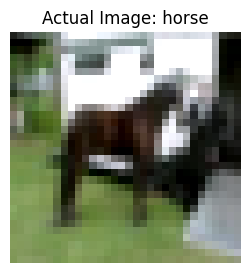

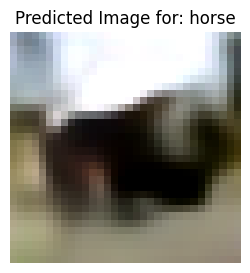

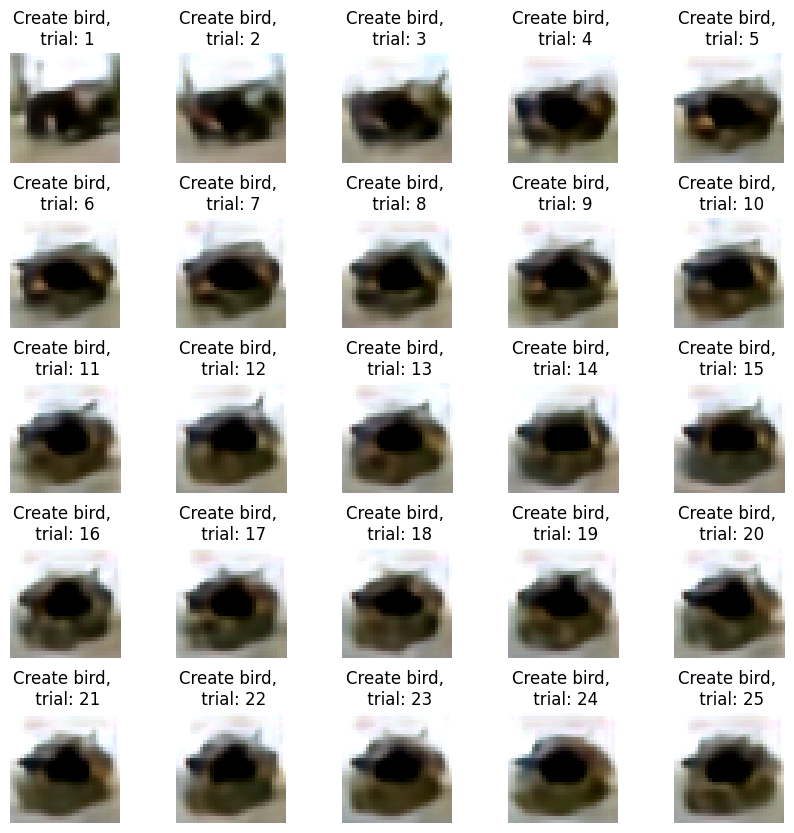

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow, figure
import numpy as np
from torchvision.utils import make_grid
from pl_bolts.transforms.dataset_normalizations import cifar10_normalization
import random

test_dl = datamodule.test_dataloader()
for batch in test_dl:
    images, label_ohe, label_ohe_random= batch
    break  # Break to get the first batch (a batch of images and labels)

# Select one image and its corresponding label OHE
index = random.randint(0, 63)
image = images[index]
label_ohe_valid= label_ohe[index]
label_ohe_invalid = label_ohe_random[index]

# Define CIFAR-10 class labels
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get the CIFAR10 labels
label_valid = cifar10_classes[np.argmax(label_ohe_valid)]
label_invalid = cifar10_classes[np.argmax(label_ohe_invalid)]

# UNDO DATA NORMALIZATION
normalize = cifar10_normalization()
mean, std = np.array(normalize.mean), np.array(normalize.std)
# PyTorch stores images as (C, H, W), so we transpose it to (H, W, C)
img = image.permute(1, 2, 0).numpy()*std + mean 

# PLOT IMAGES
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(img)  
plt.title(f"Actual Image: {label_valid}")  # Set the title as the class label
plt.axis('off')  # Turn off axis labels
plt.show()

image = image.unsqueeze(0)

with torch.no_grad():
    model_vae = model_vae.to('cuda')  # Move the entire model to GPU
    # Now pass this image through VAE encoder and plot the decoder output
    encoded_image = model_vae.encoder(image.to('cuda'))
    combined_features = torch.cat((encoded_image, label_ohe_valid.unsqueeze(0).to('cuda')), dim=1) #get OHE for label features
    mu, log_var = model_vae.fc_mu(combined_features), model_vae.fc_var(combined_features)

    # sample z from q
    std_ = torch.exp(log_var / 2)
    q = torch.distributions.Normal(mu, std_)
    z = q.rsample()

    # decoded 
    decoded_image = model_vae.decoder(z).to('cpu')

decoded_img = decoded_image[0].permute(1, 2, 0).numpy()*std + mean

# Plot the generated image with actual label
plt.figure(figsize=(3, 3))  # Adjust the size as needed
plt.imshow(decoded_img)
plt.axis('off')
plt.title(f"Predicted Image for: {label_valid}")
plt.show()

decoded_images = []
decoded_images_plot = []
with torch.no_grad():
    
    for i in range(25):   
        if len(decoded_images) == 0:
            image = image
        else:
            image = decoded_images[-1]
        # Now pass this image through VAE encoder and plot the decoder output
        encoded_image = model_vae.encoder(image.to('cuda'))
        combined_features = torch.cat((encoded_image, label_ohe_invalid.unsqueeze(0).to('cuda')), dim=1) #get OHE for label features
        mu, log_var = model_vae.fc_mu(combined_features), model_vae.fc_var(combined_features)

        # sample z from q
        std_ = torch.exp(log_var / 2)
        q = torch.distributions.Normal(mu, std_)
        z = q.rsample()

        # decoded 
        decoded_image = model_vae.decoder(z)
        decoded_images.append(decoded_image)
        decoded_image = decoded_image.to('cpu')
        decoded_images_plot.append(decoded_image[0].permute(1, 2, 0).numpy()*std + mean)

# Plot the 25 images

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Flatten the axes array so that we can iterate over it easily
axes = axes.flatten()

# Iterate through the images and plot them in the subplots
for i, ax in enumerate(axes):
    ax.imshow(decoded_images_plot[i])  # Replace 'gray' with a colormap of your choice
    ax.set_title(f"Create {label_invalid}, \n trial: {i+1}")
    ax.axis('off')  # Turn off axis labels and ticks

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Display the plot
plt.show()